# **📌Extracción**

## Extracción de datos

In [ ]:
# Importar librerías
import pandas as pd
import numpy as np

# Extraer datos desde la api
datos = pd.read_json('https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
# Normalizar datos de cliente y demás columnas
datos_customer = pd.json_normalize(datos['customer'])
datos_customer.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [ ]:
datos_phone = pd.json_normalize(datos['phone'])
datos_phone.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [ ]:
datos_internet = pd.json_normalize(datos['internet'])
datos_internet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [ ]:
datos_account = pd.json_normalize(datos['account'])
datos_account.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
# Agregar las columnas normalizadas y eliminar las anteriores
df = pd.concat([datos.drop(columns=['customer', 'phone', 'internet', 'account']),
                                datos_customer, datos_phone, datos_internet, datos_account], axis = 1)
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


# **🔧Transformación**

## Conjunto de datos

In [ ]:
# Información de dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


## Comprobación de incoherencias

In [ ]:
# Búsqueda de valores nulos
df.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [ ]:
# Valores únicos de cada columna
columnas = df.columns

for columna in columnas:
  print(f'Datos únicos en {columna}: {df[columna].unique()}')

Datos únicos en customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Datos únicos en Churn: ['No' 'Yes' '']
Datos únicos en gender: ['Female' 'Male']
Datos únicos en SeniorCitizen: [0 1]
Datos únicos en Partner: ['Yes' 'No']
Datos únicos en Dependents: ['Yes' 'No']
Datos únicos en tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
Datos únicos en PhoneService: ['Yes' 'No']
Datos únicos en MultipleLines: ['No' 'Yes' 'No phone service']
Datos únicos en InternetService: ['DSL' 'Fiber optic' 'No']
Datos únicos en OnlineSecurity: ['No' 'Yes' 'No internet service']
Datos únicos en OnlineBackup: ['Yes' 'No' 'No internet service']
Datos únicos en DeviceProtection: ['No' 'Yes' 'No internet service']
Datos únicos en TechSupport: ['Yes' 'No' 'No internet service']
Datos único

In [ ]:
# Debido a que hay varios valores únicos en Charges.Total pero en la info
# aparace como dato de tipo object, se busca qué datos no numéricos hay
valores_no_numericos = df[pd.to_numeric(df['Charges.Total'], errors='coerce').isna()]
no_numericos_unicos = valores_no_numericos['Charges.Total'].unique()
print(f'Valores no númericos únicos encontrados: {no_numericos_unicos}')

Valores no númericos únicos encontrados: [' ']


In [ ]:
print(f"Filas con '' en Churn: {(df['Churn'] == '').sum()}")
print(f"Filas con ' ' en Charges.Total: {(df['Charges.Total'] == ' ').sum()}")

Filas con '' en Churn: 224
Filas con ' ' en Charges.Total: 11


## Manejo de inconsistencias

In [ ]:
# Debido a que son pocas filas, se procede a eliminarlas
df['Churn'] = df['Churn'].replace('', np.nan)
df['Charges.Total'] = df['Charges.Total'].replace(' ', np.nan)

df = df.dropna(subset=['Churn', 'Charges.Total']).copy()

In [ ]:
# Se han eliminado las filas que contenían valores faltantes
df.shape

(7032, 21)

In [ ]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

## Columna de cuentas diarias

In [ ]:
# Agregar columna de cuentas diarias
df['CuentasDiarias'] = (df['Charges.Monthly']/30).round(2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 
 17  

## Estandarización

In [ ]:
columnas_categoricas = ['Churn', 'gender', 'SeniorCitizen', 'Partner',
                        'Dependents', 'PhoneService', 'MultipleLines',
                        'InternetService', 'OnlineSecurity', 'OnlineBackup',
                        'DeviceProtection', 'TechSupport', 'StreamingTV',
                        'StreamingMovies', 'Contract', 'PaperlessBilling',
                        'PaymentMethod']
df[columnas_categoricas] = df[columnas_categoricas].astype('category')
df['Charges.Total'] = df['Charges.Total'].astype(np.float64)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   Churn             7032 non-null   category
 2   gender            7032 non-null   category
 3   SeniorCitizen     7032 non-null   category
 4   Partner           7032 non-null   category
 5   Dependents        7032 non-null   category
 6   tenure            7032 non-null   int64   
 7   PhoneService      7032 non-null   category
 8   MultipleLines     7032 non-null   category
 9   InternetService   7032 non-null   category
 10  OnlineSecurity    7032 non-null   category
 11  OnlineBackup      7032 non-null   category
 12  DeviceProtection  7032 non-null   category
 13  TechSupport       7032 non-null   category
 14  StreamingTV       7032 non-null   category
 15  StreamingMovies   7032 non-null   category
 16  Contract          7032 non-nu

# **📊Carga y análisis**

## **Análisis descriptivo**

### **Columnas numéricas**



In [ ]:
df.describe()

,tenure,Charges.Monthly,Charges.Total,CuentasDiarias
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,2.159891
std,24.545260,30.085974,2266.771362,1.002955
min,1.000000,18.250000,18.800000,0.610000
25%,9.000000,35.587500,401.450000,1.187500
50%,29.000000,70.350000,1397.475000,2.340000
75%,55.000000,89.862500,3794.737500,2.992500
max,72.000000,118.750000,8684.800000,3.960000


### **Columnas categóricas**

In [ ]:
cat_cols = df.select_dtypes(include='category').columns
print(df[cat_cols].describe())

       Churn gender  SeniorCitizen Partner Dependents PhoneService  \
count   7032   7032           7032    7032       7032         7032   
unique     2      2              2       2          2            2   
top       No   Male              0      No         No          Yes   
freq    5163   3549           5890    3639       4933         6352   

       MultipleLines InternetService OnlineSecurity OnlineBackup  \
count           7032            7032           7032         7032   
unique             3               3              3            3   
top               No     Fiber optic             No           No   
freq            3385            3096           3497         3087   

       DeviceProtection TechSupport StreamingTV StreamingMovies  \
count              7032        7032        7032            7032   
unique                3           3           3               3   
top                  No          No          No              No   
freq               3094        3472     

## **Distribuvión de evasión**

In [ ]:
# Importar librerías
import matplotlib.pyplot as plt
import seaborn as sns

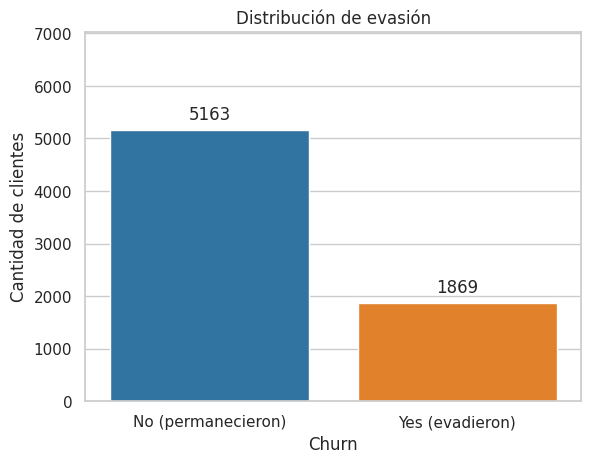

In [ ]:
sns.set_theme(style='whitegrid')
counts = df['Churn'].value_counts().reset_index()
counts.columns = ['Churn', 'Cantidad']

def graficar_distribucion_evasion():
  sns.barplot(data=counts, x='Churn', y='Cantidad', hue=counts.index,
              palette='tab10', legend=False)

  for index, row in counts.iterrows():
      plt.text(index, row['Cantidad'] + 200, row['Cantidad'], ha='center')

  plt.title('Distribución de evasión')
  plt.xlabel('Churn')
  plt.ylabel('Cantidad de clientes')
  plt.xticks(ticks=[0, 1], labels=['No (permanecieron)', 'Yes (evadieron)'])
  plt.ylim(0, 7032)

  plt.show()

graficar_distribucion_evasion()

## **Recuento de evación por variables categóricas**

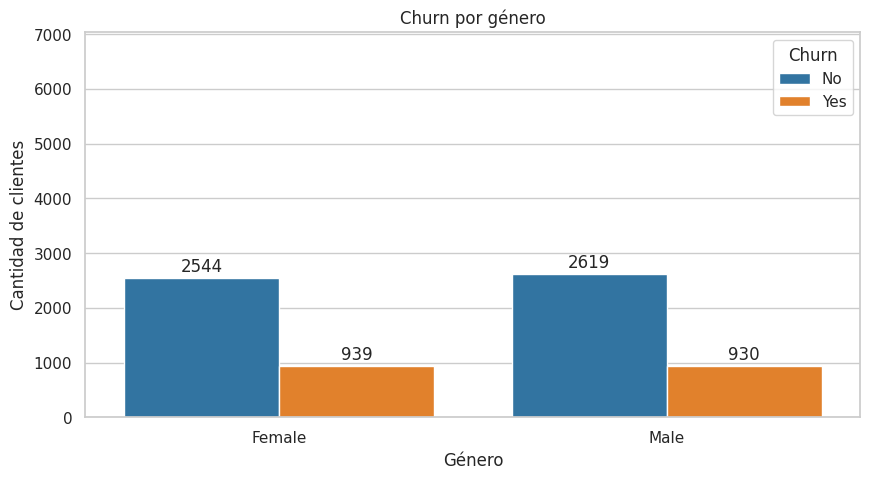

In [ ]:
def grafica_categorica(columna, titulo, xlabel):
  # Contar Yes/No por dependientes
  counts = df.groupby([columna, 'Churn'], observed=True).size().reset_index(name='Cantidad')

  # Graficar con barras agrupadas
  plt.figure(figsize = (10,5))
  ax = sns.barplot(data=counts, x=columna, y='Cantidad', hue='Churn',
              palette='tab10')

  for container in ax.containers:
      ax.bar_label(container, label_type='edge', padding=2)

  plt.title(titulo)
  plt.xlabel(xlabel)
  plt.ylabel('Cantidad de clientes')
  plt.ylim(0, 7032)
  plt.show()

grafica_categorica('gender', 'Churn por género', 'Género')

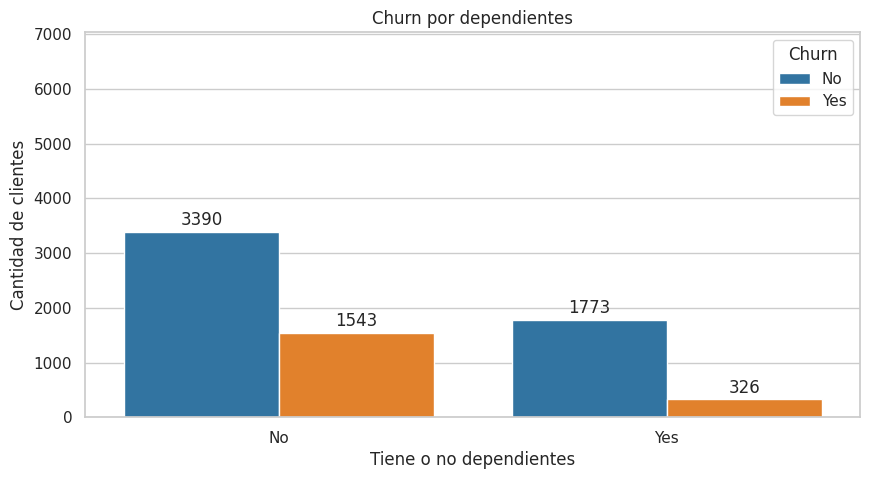

In [ ]:
grafica_categorica('Dependents', 'Churn por dependientes', 'Tiene o no dependientes')

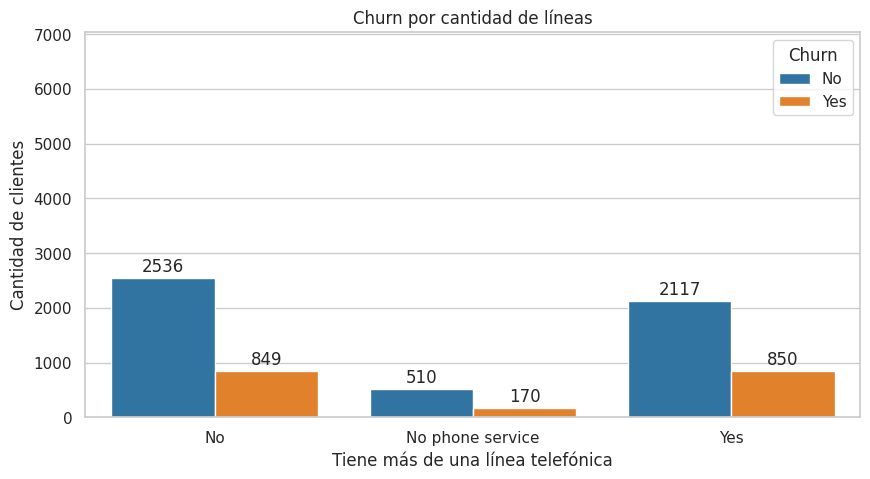

In [ ]:
grafica_categorica('MultipleLines', 'Churn por cantidad de líneas', 'Tiene más de una línea telefónica')

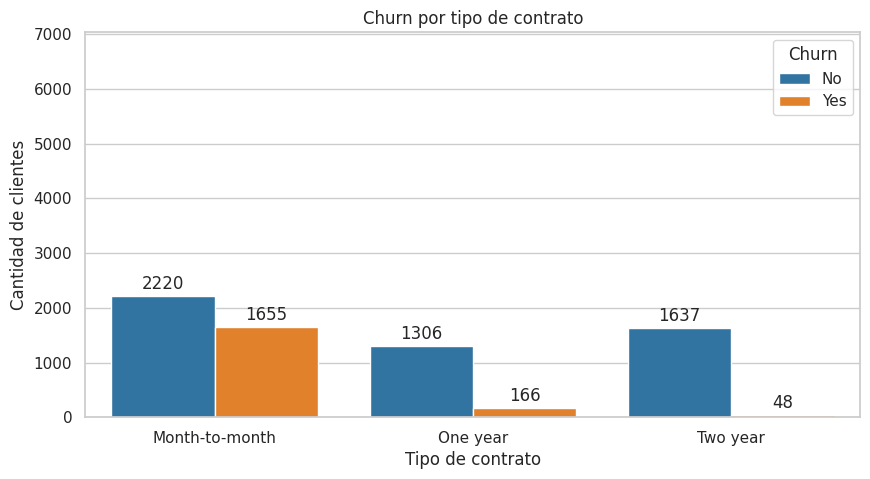

In [ ]:
grafica_categorica('Contract', 'Churn por tipo de contrato', 'Tipo de contrato')

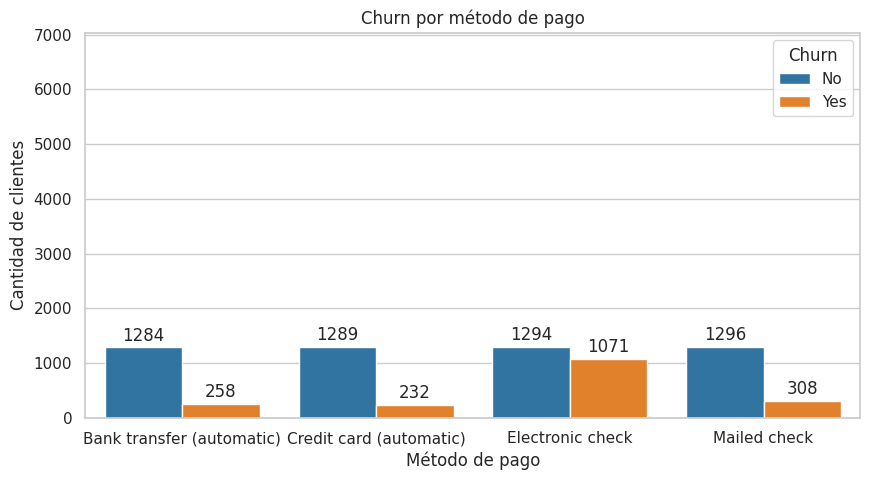

In [ ]:
grafica_categorica('PaymentMethod', 'Churn por método de pago', 'Método de pago')

## **Conteo de evasión por variables numéricas**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   Churn             7032 non-null   category
 2   gender            7032 non-null   category
 3   SeniorCitizen     7032 non-null   category
 4   Partner           7032 non-null   category
 5   Dependents        7032 non-null   category
 6   tenure            7032 non-null   int64   
 7   PhoneService      7032 non-null   category
 8   MultipleLines     7032 non-null   category
 9   InternetService   7032 non-null   category
 10  OnlineSecurity    7032 non-null   category
 11  OnlineBackup      7032 non-null   category
 12  DeviceProtection  7032 non-null   category
 13  TechSupport       7032 non-null   category
 14  StreamingTV       7032 non-null   category
 15  StreamingMovies   7032 non-null   category
 16  Contract          7032 non-nu

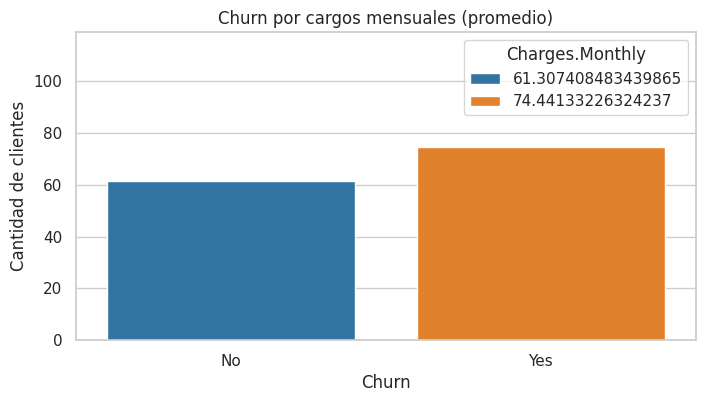

In [ ]:
def grafica_numerica(columna, titulo, xlabel, y):
  # Contar Yes/No por dependientes
  promedios = df.groupby('Churn', observed=True)[columna].mean().reset_index()

  # Graficar con barras agrupadas
  plt.figure(figsize = (8,4))
  ax = sns.barplot(data=promedios, x='Churn', y=columna, hue=columna,
              palette='tab10')

  # for container in ax.containers:
  #     ax.bar_label(container, label_type='edge', padding=2)

  plt.title(titulo)
  plt.xlabel(xlabel)
  plt.ylabel('Cantidad de clientes')
  plt.ylim(0, y)
  plt.show()

grafica_numerica('Charges.Monthly', 'Churn por cargos mensuales (promedio)', 'Churn', 118.75)

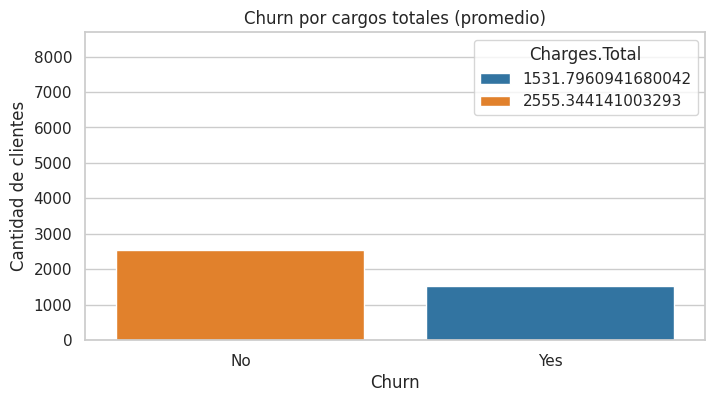

In [ ]:
grafica_numerica('Charges.Total', 'Churn por cargos totales (promedio)', 'Churn', 8684.80)

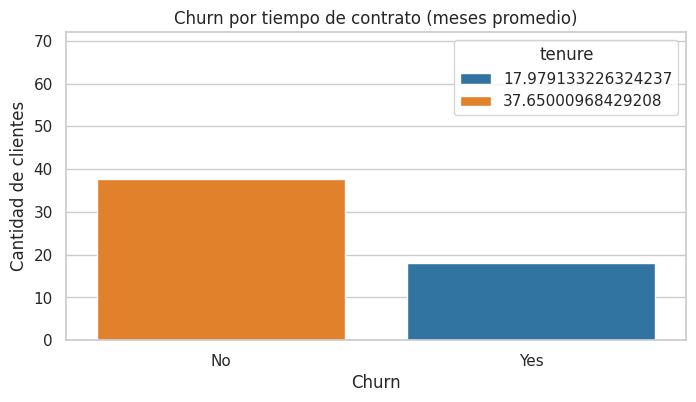

In [ ]:
grafica_numerica('tenure', 'Churn por tiempo de contrato (meses promedio)', 'Churn', 72)

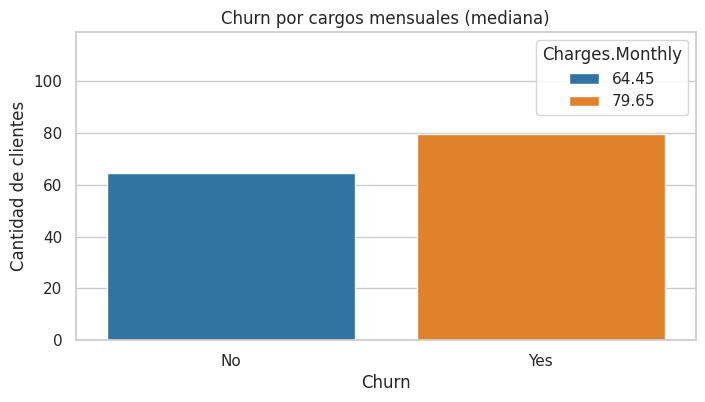

In [87]:
def grafica_numerica_mediana(columna, titulo, xlabel, y):
  # Contar Yes/No por dependientes
  promedios = df.groupby('Churn', observed=True)[columna].median().reset_index()

  # Graficar con barras agrupadas
  plt.figure(figsize = (8,4))
  ax = sns.barplot(data=promedios, x='Churn', y=columna, hue=columna,
              palette='tab10')

  # for container in ax.containers:
  #     ax.bar_label(container, label_type='edge', padding=2)

  plt.title(titulo)
  plt.xlabel(xlabel)
  plt.ylabel('Cantidad de clientes')
  plt.ylim(0, y)
  plt.show()

grafica_numerica_mediana('Charges.Monthly', 'Churn por cargos mensuales (mediana)', 'Churn', 118.75)

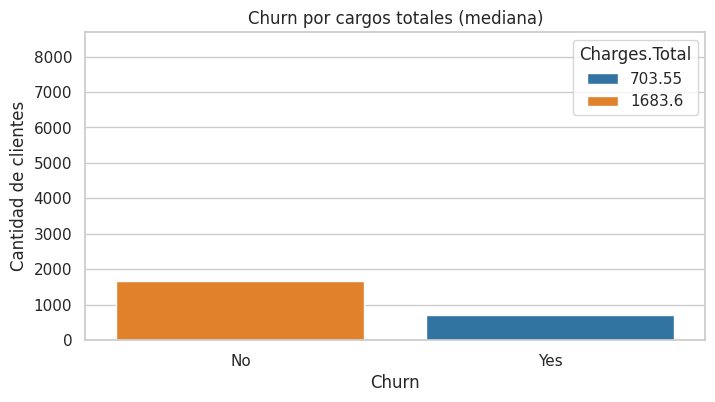

In [ ]:
grafica_numerica_mediana('Charges.Total', 'Churn por cargos totales (mediana)', 'Churn', 8684.80)

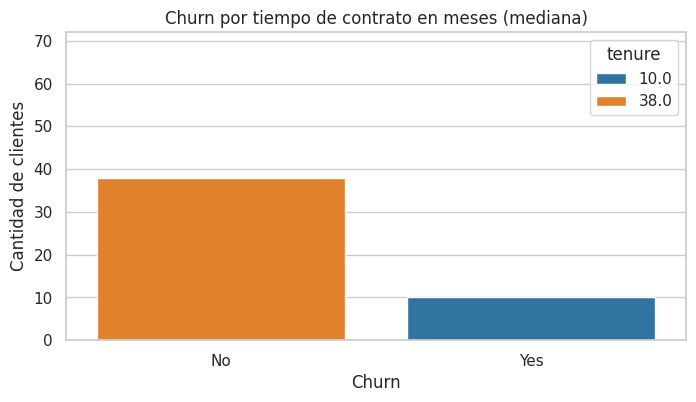

In [ ]:
grafica_numerica_mediana('tenure', 'Churn por tiempo de contrato en meses (mediana)', 'Churn', 72)

## **Informe final**

### **Introducción**

La empresa Telecom X enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes. Para esto se realizó una recopilación, procesamiento y análisis de los datos disponibles para extraer información valiosa.

En este informe se describe el procedimiento y se presenta el análisis de los resultados obtenidos en este ejercicio.

### **Limpieza y Tratamiento de Datos**

El primer paso fue extraer la información desde una API utilizando pandas. El archivo de extensión json contaba con 3 columnas que contenían más información en forma de diccionario de python, por lo que dichas columnas se necesitaron normalizar para después concatenar todas las nuevas columnas obtenidas y retirar las iniciales.

Observando y obteniendo el tipo de datos y los valores únicos de cada columna se hizo la comprobación de inconsistencias para posteriormente tratarlas. En el caso de datos faltantes o cadenas de texto vacío se procedió eliminando las filas enteras debido a que representaban aproximadamente el 3% de los datos totales.

Posteriormente se creó la columna de cuentas diarias a partir de la columna de cuentas mensuales.

Finalmente, se estandarizaron las columnas con contenido categórico y numéricos para su futura manipulación.


### **Análisis Exploratorio de Datos**

El primer paso del análisis fue describir las columnas categóricas y numéricas para poder comprender el comportamiento de los clientes en esta empresa

De las columnas numéricas se obtuvo:

**Tenure (Meses de contrato del cliente)**

* Promedio: 32.42 meses
* Mínimo: 1 mes
* Máximo: 72 meses
* Mediana: 29 meses
* Desviación estándar: 24.54 meses

La media (32.42) es mayor que la mediana (29), lo cual sugiere una ligera asimetría positiva o sesgo a la derecha. Esto podría indicar que hay algunos casos con permanencias muy largas (cercanas al máximo de 72 meses) que están “empujando” la media hacia arriba.

La desviación estándar es alta (24.54) en comparación con la media, lo que significa que los valores de permanencia están muy dispersos: hay mucha variabilidad entre unos y otros. La permanencia no parece ser consistente; algunas personas permanecen muy poco tiempo, mientras que otras se quedan muchos años.

---
**Charges monthly**

* Promedio: 64.79
* Mínimo: 18.25
* Máximo: 118.75
* Mediana: 70.35
* Desviación estándar: 30.08

La media (64.79) es menor que la mediana (70.35), lo cual sugiere una asimetría negativa: hay una mayor concentración de valores altos, y unos pocos valores bajos podrían estar jalando la media hacia abajo.

La desviación estándar de 30.08 es casi la mitad de la media, lo cual indica una dispersión considerable en los cargos mensuales.

Con un mínimo de 18.25 y un máximo de 118.75, el rango es de 100.5 unidades, lo que sugiere una variedad significativa de planes o consumos mensuales.

---
**Charges total**

* Promedio: 2283.30
* Mínimo: 18.80
* Máximo: 8684.80
* Mediana: 1397.47
* Desviación estándar: 2266.77

La media (2283.30) es mucho mayor que la mediana (1397.47), lo que sugiere una fuerte asimetría positiva: la mayoría de los clientes tiene cargos totales más bajos, pero hay algunos con cargos extremadamente altos que elevan la media.

La desviación estándar (2266.77) es casi igual a la media, lo que indica que los valores están muy dispersos.

Un máximo de 8684.80, frente a un mínimo de apenas 18.80, revela una enorme diferencia entre casos.

Mientas que de las columnas catergóricas se obtuvo:

**Churn**

73.42% de clientes no ha evadido (una gran mayoría).

**Gender**

50.47% de clientes es hombres (valor muy cercano a la mitad)

**Senior Citizen**

83.75% de clientes son menores de 65 años.

**Partner**

51.75% de clientes no tiene pareja.

**Dependents**

70.15% de clientes no tiene dependientes.

**Phone Service**

90.32% de clientes tienen el servicio de teléfono.

**Multiple Lines**

48.13% de clientes tiene suscripción a más de una línea teléfónica.

**Internet Service**

44.02% tienen suscripción a un proveedor de internet.

---
Del resto de suscripciones adicionales, el porcentaje es cercano o menor al 50%.

---
**Contract**

De las 3 opciones de contrato, la opcío más elegida es mes a mes con un 55.10%.

**PaperlessBilling**

59.27% de clientes prefiere recibir la factura en línea.

**Payment Method**

De los 4 métodos de pago, el más usado es Electronic check con un 33.63%.

Posteriormente se obtuvo la distribución de evasión que solo cuenta con las respuestas sí o no, se pudo observar que el 26.57% de clientes ha evadido.

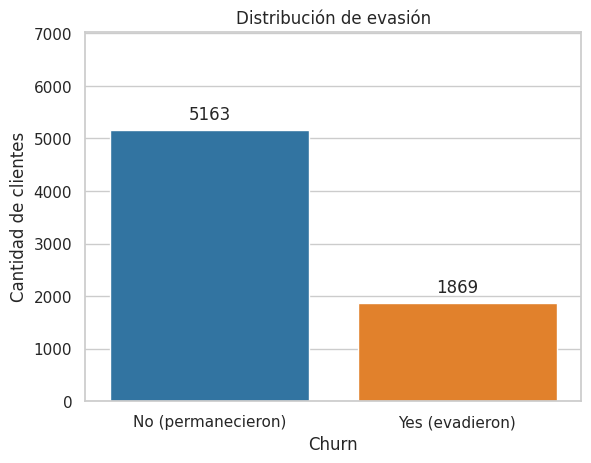

Se analizaron el recuento de evasión por columnas categóricas y columnas como género, senior citizen, o multiple lines no presentan una gran disparidad porcentual respecto a los clientes que evadieron y los que no. Por otro lado, hay patrones notorios en la evasión para el tipo de contrato y el método de pago.

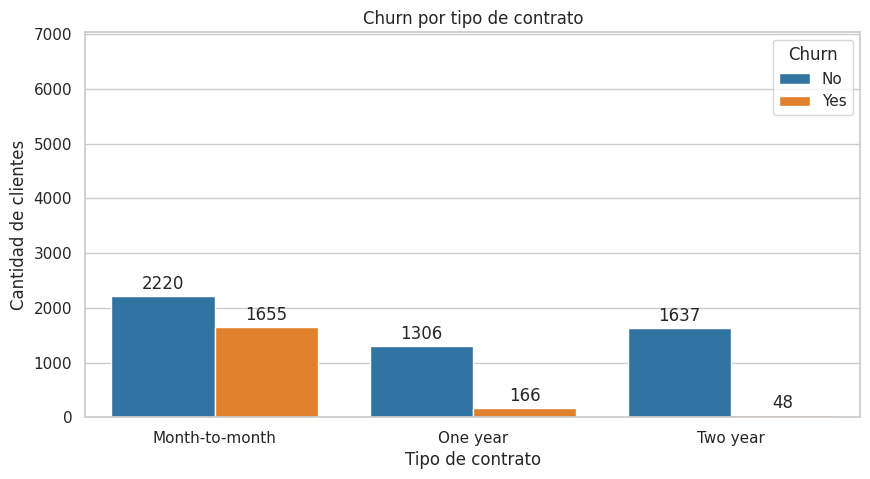

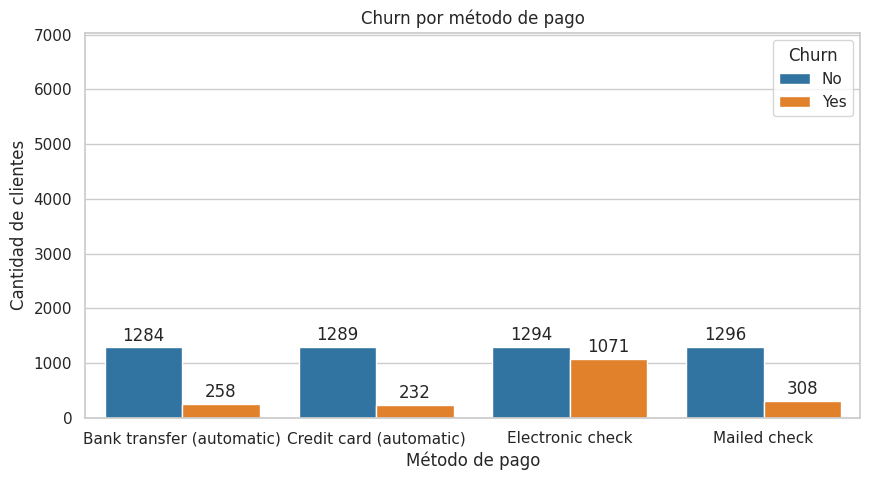

Para el conteo de evasión por variables numéricas se consideró el promedio y la mediana de los datos en las columnas de cuentas y tiempo de contrato. A pesar de la dispersión de los datos no hay mucha diferencia entre la mediana y el promedio de estos conjuntos de datos

En general, en los clientes que evadieron se observan cuentas mensuales más altas pero cuentas totales más bajas, esto se se explica visualizando el tiempo de contrato, en el que los clientes que evadieron muestran menor cantidad de meses (en promedio casi dos años menos de tiempo de contrato).

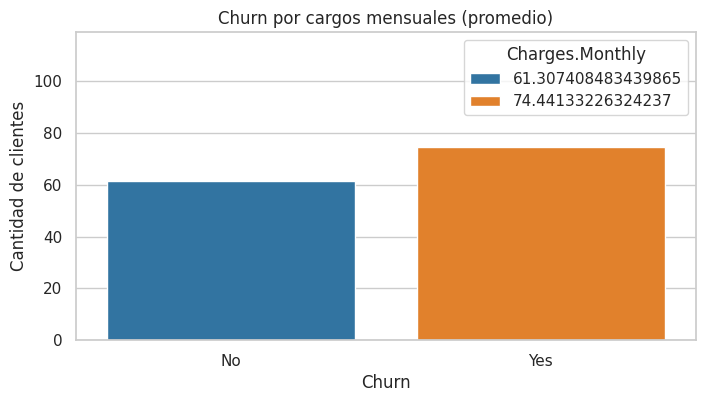

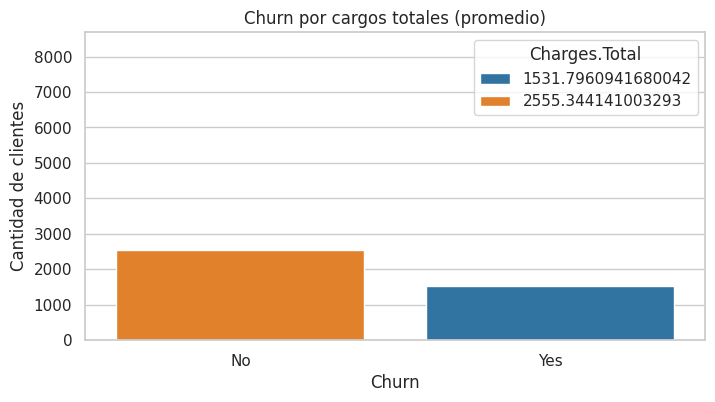

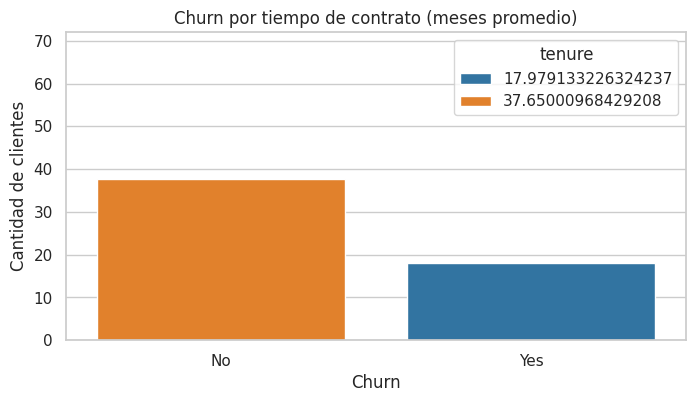

### **Conclusiones e Insights**



*   Más del 25% de clientes a evadido.
*   Existe una relación entre la evasión y el tipo de contrato "mes a mes".
*   Existe una relación entre la evasión y el método de pago "Cheque electrónico"
*   Los clientes que evaden tienen más cuentas mensuales pero menos cuentas totales, al mismo tiempo que menos tiempo de contrato.



### **Recomendaciones**

1. Fidelización de clientes con contrato mensual:

* Ofrecer incentivos para migrar a contratos de mayor plazo (descuentos por pago anual o trimestral, beneficios adicionales por permanencia).

* Diseñar campañas específicas para clientes con contrato “mes a mes”, ya que presentan mayor probabilidad de evasión.

2. Optimizar método de pago:

* Promover métodos de pago automáticos o con menor fricción (tarjeta, débito automático) para clientes que actualmente usan “cheque electrónico”, acompañado de beneficios por cambiar.

* Analizar si este método está asociado a clientes menos digitalizados y crear estrategias de retención para ese segmento.

3. Incrementar valor percibido en clientes con bajo tiempo de permanencia:

* Implementar un onboarding más robusto en los primeros meses (seguimiento personalizado, beneficios de bienvenida, soporte proactivo).

* Crear ofertas de “upgrade” o paquetes con más valor a clientes que recién inician para evitar deserción temprana.

4. Maximizar ingresos de clientes con alta facturación mensual pero baja facturación total:

* Identificar a los clientes de alto gasto mensual que abandonan pronto y diseñar ofertas de retención personalizadas.

* Analizar si el alto costo mensual está generando insatisfacción o sensación de poca relación costo-beneficio.